# Given the stock information of at least the past 5 days of all companies, try to predict the closing price of one company on a particular day

# Load libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load dataset and process Date

In [27]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Admin\IT1244-Stock-Market\train_data.csv")

# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_29248\4188221876.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\Admin\IT1244-Stock-Market\train_data.csv")


# Retrieve the relevant information

In [28]:
# Define the company of interest
target_company = 'CF'  # Replace with your target company name

# Ensure we have data for the target company
if target_company not in data['Symbol'].unique():
    raise ValueError(f"{target_company} is not in the dataset.")

# Filter data for the target company
target_data = data[data['Symbol'] == target_company].set_index('Date')

# Ensure we have enough data for the target company
if len(target_data) < 5:
    raise ValueError("Not enough data to predict. At least 5 days are required.")

# Get the industry of the target company
target_industry = target_data['GICS Sector'].iloc[0]  # Assuming 'Industry' is a column in your data

# Filter data for companies in the same industry
industry_data = data[data['GICS Sector'] == target_industry]

# Get the last n days of data for the target company
last_n_days_target = target_data['Close'].tail(120)

# Get the last n days of data for all companies in the same industry
last_n_days_industry = industry_data[industry_data['Date'].isin(last_n_days_target.index)]
avg_last_n_days = last_n_days_industry.groupby('Date')['Close'].mean()

print(target_data['GICS Sector'])
print(avg_last_n_days)


Date
2020-09-30    Materials
2020-10-01    Materials
2020-10-02    Materials
2020-10-05    Materials
2020-10-06    Materials
                ...    
2021-12-27    Materials
2021-12-28    Materials
2021-12-29    Materials
2021-12-30    Materials
2021-12-31    Materials
Name: GICS Sector, Length: 317, dtype: object
Date
2021-07-14    129.245762
2021-07-15    129.439429
2021-07-16    127.487654
2021-07-19    124.657016
2021-07-20    126.326106
                 ...    
2021-12-27    142.363215
2021-12-28    143.143928
2021-12-29    143.790357
2021-12-30    143.133213
2021-12-31    143.803571
Name: Close, Length: 120, dtype: float64


# Model and forecast

In [29]:
# Fit the Holt-Winters model
model = ExponentialSmoothing(
    avg_last_n_days,
    trend='add',
    seasonal=None  # Assuming no seasonality for short-term prediction
).fit()

# Forecast the next day's closing price
forecast = model.forecast(steps=1)

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


# Output and visualisation

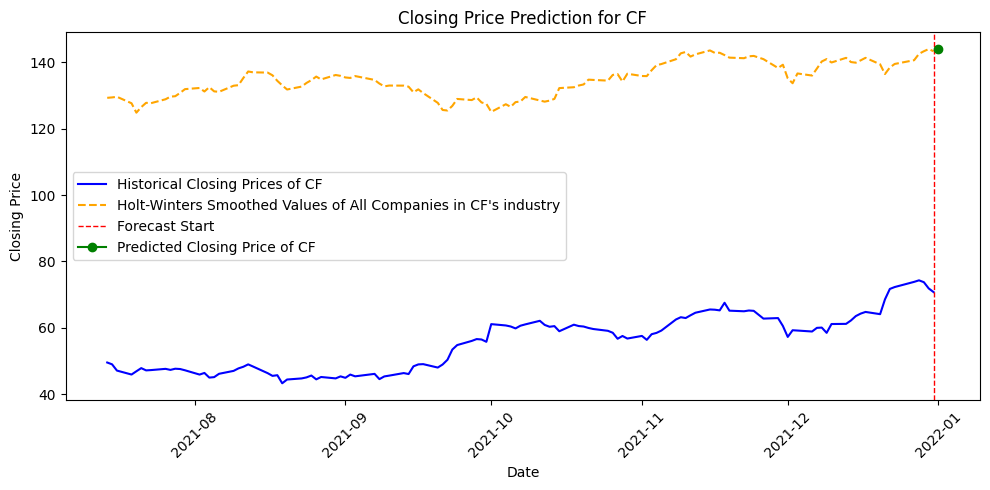

Predicted Closing Price for CF on the next day: 143.92590644215605


In [30]:
# Prepare data for visualization
smoothed_values = model.fittedvalues

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(last_n_days_target.index, last_n_days_target, label=f'Historical Closing Prices of {target_company}', color='blue')
plt.plot(smoothed_values.index, smoothed_values, label= f"Holt-Winters Smoothed Values of All Companies in {target_company}'s industry", color='orange', linestyle='--')
plt.axvline(x=last_n_days_target.index[-1], color='red', linewidth=1, linestyle='--', label='Forecast Start')
plt.plot(last_n_days_target.index[-1] + pd.DateOffset(days=1), forecast, marker='o', label=f'Predicted Closing Price of {target_company}', color='green')
plt.title(f'Closing Price Prediction for {target_company}')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Output the predicted closing price
print(f'Predicted Closing Price for {target_company} on the next day: {forecast.iloc[0]}')